In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
url = 'Dataset/'

In [3]:
# dataset_A = url + 'Dataset C.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [4]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [5]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [6]:
TRAIN_PATH = url + 'training-c'


In [7]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [8]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)


print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


# **Base Parameters**

In [15]:
batch_size = 280
num_iters = 25000
input_dim = 28*28
num_hidden = 340
output_dim = 10

learning_rate = 0.025

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

288


In [16]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
# np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:70
Test dataloader:18


In [17]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
#         self.linear_6 = nn.Linear(num_hidden, num_hidden)
#         self.relu_6 = nn.ReLU()
        
#         self.linear_7 = nn.Linear(num_hidden, num_hidden)
#         self.relu_7 = nn.ReLU()
        
#         self.linear_8 = nn.Linear(num_hidden, num_hidden)
#         self.relu_8 = nn.ReLU()
        
#         self.linear_9 = nn.Linear(num_hidden, num_hidden)
#         self.relu_9 = nn.ReLU()

#         self.linear_10 = nn.Linear(num_hidden, num_hidden)
#         self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
#         out  = self.linear_6(out)
#         out = self.relu_6(out)
        
#         out  = self.linear_7(out)
#         out = self.relu_7(out)
        
#         out  = self.linear_8(out)
#         out = self.relu_8(out)
        
#         out  = self.linear_9(out)
#         out = self.relu_9(out)
        
#         out  = self.linear_10(out)
#         out = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas

In [18]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=340, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=340, out_features=340, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=340, out_features=340, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=340, out_features=340, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=340, out_features=340, bias=True)
  (relu_5): ReLU()
  (linear_out): Linear(in_features=340, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

In [20]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.310192823410034. Accuracy: 10.146120600946697
Iteration: 20. Loss: 2.2646231651306152. Accuracy: 11.319201481786376
Iteration: 30. Loss: 2.2255804538726807. Accuracy: 16.23790903478082
Iteration: 40. Loss: 2.1839067935943604. Accuracy: 17.349248816628936
Iteration: 50. Loss: 2.189829111099243. Accuracy: 16.50545379707759
Iteration: 60. Loss: 2.137085437774658. Accuracy: 19.551348013994648
Iteration: 70. Loss: 2.747332811355591. Accuracy: 13.747684708787816
Epoch:  2
Iteration: 80. Loss: 2.084721565246582. Accuracy: 17.884338341222474
Iteration: 90. Loss: 2.1200168132781982. Accuracy: 18.95451739040955
Iteration: 100. Loss: 2.04986834526062. Accuracy: 20.80675036015641
Iteration: 110. Loss: 2.061260223388672. Accuracy: 22.988269191191602
Iteration: 120. Loss: 2.0962564945220947. Accuracy: 22.165054537970775
Iteration: 130. Loss: 2.100984811782837. Accuracy: 21.876929409343486
Iteration: 140. Loss: 2.4666330814361572. Accuracy: 14.076970570076147
Epoch:  

Iteration: 1160. Loss: 0.6629412174224854. Accuracy: 68.8619057419222
Iteration: 1170. Loss: 0.6644143462181091. Accuracy: 70.85820127598271
Iteration: 1180. Loss: 0.5841741561889648. Accuracy: 71.22864786993209
Iteration: 1190. Loss: 1.0919215679168701. Accuracy: 67.27721753447211
Epoch:  18
Iteration: 1200. Loss: 0.6884409189224243. Accuracy: 71.22864786993209
Iteration: 1210. Loss: 0.6487391591072083. Accuracy: 71.10516567194897
Iteration: 1220. Loss: 0.6458284258842468. Accuracy: 70.98168347396583
Iteration: 1230. Loss: 0.6173557043075562. Accuracy: 70.69355834533854
Iteration: 1240. Loss: 0.6588991284370422. Accuracy: 70.52891541469438
Iteration: 1250. Loss: 0.7467513084411621. Accuracy: 68.96480757357482
Iteration: 1260. Loss: 0.9476574659347534. Accuracy: 67.03025313850587
Epoch:  19
Iteration: 1270. Loss: 0.5531048774719238. Accuracy: 71.96954105783082
Iteration: 1280. Loss: 0.6294687986373901. Accuracy: 71.86663922617822
Iteration: 1290. Loss: 0.6325254440307617. Accuracy: 72.

Iteration: 2300. Loss: 0.41022560000419617. Accuracy: 77.9172669273513
Iteration: 2310. Loss: 0.7615359425544739. Accuracy: 76.49722165054538
Epoch:  34
Iteration: 2320. Loss: 0.3368094265460968. Accuracy: 77.19695410578308
Iteration: 2330. Loss: 0.4562627077102661. Accuracy: 78.14365095698703
Iteration: 2340. Loss: 0.3310067057609558. Accuracy: 78.28771352130067
Iteration: 2350. Loss: 0.4105912446975708. Accuracy: 77.9172669273513
Iteration: 2360. Loss: 0.3837053179740906. Accuracy: 78.61699938258901
Iteration: 2370. Loss: 0.36949968338012695. Accuracy: 79.29615147149619
Iteration: 2380. Loss: 0.7369138598442078. Accuracy: 77.87610619469027
Epoch:  35
Iteration: 2390. Loss: 0.39137446880340576. Accuracy: 78.28771352130067
Iteration: 2400. Loss: 0.37346991896629333. Accuracy: 78.55525828359745
Iteration: 2410. Loss: 0.36638593673706055. Accuracy: 79.27557110516567
Iteration: 2420. Loss: 0.4912964999675751. Accuracy: 77.83494546202922
Iteration: 2430. Loss: 0.46878841519355774. Accuracy

Iteration: 3430. Loss: 0.6572113633155823. Accuracy: 79.66659806544557
Epoch:  50
Iteration: 3440. Loss: 0.2825315296649933. Accuracy: 79.8929820950813
Iteration: 3450. Loss: 0.263492614030838. Accuracy: 80.5103930849969
Iteration: 3460. Loss: 0.2527180314064026. Accuracy: 79.74891953076765
Iteration: 3470. Loss: 0.29449304938316345. Accuracy: 81.23070590656513
Iteration: 3480. Loss: 0.24697603285312653. Accuracy: 80.22226795636962
Iteration: 3490. Loss: 0.22428388893604279. Accuracy: 80.90142004527681
Iteration: 3500. Loss: 0.3904516398906708. Accuracy: 80.67503601564108
Epoch:  51
Iteration: 3510. Loss: 0.19244901835918427. Accuracy: 80.53097345132744
Iteration: 3520. Loss: 0.29111260175704956. Accuracy: 79.13150854085202
Iteration: 3530. Loss: 0.2611054480075836. Accuracy: 80.90142004527681
Iteration: 3540. Loss: 0.3302062451839447. Accuracy: 79.8929820950813
Iteration: 3550. Loss: 0.3533002734184265. Accuracy: 79.25499073883515
Iteration: 3560. Loss: 0.2852858304977417. Accuracy: 7

Iteration: 4560. Loss: 0.20195429027080536. Accuracy: 80.92200041160733
Iteration: 4570. Loss: 0.1853163093328476. Accuracy: 80.83967894628525
Iteration: 4580. Loss: 0.14825904369354248. Accuracy: 81.4982506688619
Iteration: 4590. Loss: 0.2119605392217636. Accuracy: 81.580572134184
Iteration: 4600. Loss: 0.19366860389709473. Accuracy: 81.55999176785346
Iteration: 4610. Loss: 0.19614161550998688. Accuracy: 81.08664334225149
Iteration: 4620. Loss: 0.5280411243438721. Accuracy: 80.28400905536118
Epoch:  67
Iteration: 4630. Loss: 0.22842513024806976. Accuracy: 80.92200041160733
Iteration: 4640. Loss: 0.1675933599472046. Accuracy: 81.7863757974892
Iteration: 4650. Loss: 0.22382335364818573. Accuracy: 81.84811689648076
Iteration: 4660. Loss: 0.2317320704460144. Accuracy: 81.1895451739041
Iteration: 4670. Loss: 0.23529934883117676. Accuracy: 81.27186663922618
Iteration: 4680. Loss: 0.31080543994903564. Accuracy: 81.06606297592097
Iteration: 4690. Loss: 0.3707253336906433. Accuracy: 81.1689648

Iteration: 5690. Loss: 0.154277041554451. Accuracy: 81.93043836180284
Iteration: 5700. Loss: 0.13465243577957153. Accuracy: 81.97159909446388
Iteration: 5710. Loss: 0.11263779550790787. Accuracy: 81.66289359950608
Iteration: 5720. Loss: 0.1402094066143036. Accuracy: 81.43650956987034
Iteration: 5730. Loss: 0.13376668095588684. Accuracy: 82.8771352130068
Iteration: 5740. Loss: 0.544613242149353. Accuracy: 82.30088495575221
Epoch:  83
Iteration: 5750. Loss: 0.12595629692077637. Accuracy: 81.72463469849764
Iteration: 5760. Loss: 0.18052557110786438. Accuracy: 82.17740275776909
Iteration: 5770. Loss: 0.18175508081912994. Accuracy: 81.9921794607944
Iteration: 5780. Loss: 0.20854315161705017. Accuracy: 82.17740275776909
Iteration: 5790. Loss: 0.21891090273857117. Accuracy: 82.28030458942169
Iteration: 5800. Loss: 0.1662507802248001. Accuracy: 81.580572134184
Iteration: 5810. Loss: 0.38828274607658386. Accuracy: 81.82753653015024
Epoch:  84
Iteration: 5820. Loss: 0.1358322650194168. Accuracy:

Iteration: 6820. Loss: 0.10872717946767807. Accuracy: 82.63017081704054
Iteration: 6830. Loss: 0.09046556055545807. Accuracy: 82.56842971804898
Iteration: 6840. Loss: 0.10756763070821762. Accuracy: 81.9921794607944
Iteration: 6850. Loss: 0.1617554873228073. Accuracy: 82.19798312409961
Iteration: 6860. Loss: 0.4707663953304291. Accuracy: 81.6834739658366
Epoch:  99
Iteration: 6870. Loss: 0.1093834787607193. Accuracy: 82.89771557933732
Iteration: 6880. Loss: 0.1220555305480957. Accuracy: 81.95101872813336
Iteration: 6890. Loss: 0.10663603991270065. Accuracy: 82.13624202510805
Iteration: 6900. Loss: 0.16838158667087555. Accuracy: 82.54784935171845
Iteration: 6910. Loss: 0.16096584498882294. Accuracy: 82.8771352130068
Iteration: 6920. Loss: 0.060742124915122986. Accuracy: 81.580572134184
Iteration: 6930. Loss: 0.35909321904182434. Accuracy: 81.82753653015024
Epoch:  100
Iteration: 6940. Loss: 0.07292482256889343. Accuracy: 81.7863757974892
Iteration: 6950. Loss: 0.11642413586378098. Accura

Iteration: 7940. Loss: 0.06020703911781311. Accuracy: 83.14467997530356
Iteration: 7950. Loss: 0.1520567685365677. Accuracy: 82.52726898538793
Iteration: 7960. Loss: 0.09883137792348862. Accuracy: 82.71249228236263
Iteration: 7970. Loss: 0.14243246614933014. Accuracy: 82.91829594566784
Iteration: 7980. Loss: 0.7502951622009277. Accuracy: 81.45708993620086
Epoch:  115
Iteration: 7990. Loss: 0.15007440745830536. Accuracy: 82.42436715373533
Iteration: 8000. Loss: 0.07032383978366852. Accuracy: 82.67133154970159
Iteration: 8010. Loss: 0.07325104624032974. Accuracy: 82.73307264869315
Iteration: 8020. Loss: 0.03935921937227249. Accuracy: 82.95945667832888
Iteration: 8030. Loss: 0.09535356611013412. Accuracy: 82.28030458942169
Iteration: 8040. Loss: 0.12382151931524277. Accuracy: 82.73307264869315
Iteration: 8050. Loss: 0.4695833623409271. Accuracy: 81.86869726281128
Epoch:  116
Iteration: 8060. Loss: 0.06744405627250671. Accuracy: 82.34204568841325
Iteration: 8070. Loss: 0.14281804859638214.

Iteration: 9060. Loss: 0.07082977145910263. Accuracy: 82.89771557933732
Iteration: 9070. Loss: 0.06188195198774338. Accuracy: 83.06235850998148
Iteration: 9080. Loss: 0.060984306037425995. Accuracy: 83.06235850998148
Iteration: 9090. Loss: 0.07500427216291428. Accuracy: 83.04177814365096
Iteration: 9100. Loss: 0.41366082429885864. Accuracy: 82.11566165877753
Epoch:  131
Iteration: 9110. Loss: 0.05816689878702164. Accuracy: 82.54784935171845
Iteration: 9120. Loss: 0.051953211426734924. Accuracy: 83.22700144062564
Iteration: 9130. Loss: 0.0871281549334526. Accuracy: 82.91829594566784
Iteration: 9140. Loss: 0.0941620022058487. Accuracy: 82.7742333813542
Iteration: 9150. Loss: 0.09024689346551895. Accuracy: 82.56842971804898
Iteration: 9160. Loss: 0.12178409844636917. Accuracy: 82.73307264869315
Iteration: 9170. Loss: 0.21374842524528503. Accuracy: 81.70405433216712
Epoch:  132
Iteration: 9180. Loss: 0.0790887176990509. Accuracy: 82.79481374768471
Iteration: 9190. Loss: 0.08384975790977478

Iteration: 10180. Loss: 0.042277440428733826. Accuracy: 83.1858407079646
Iteration: 10190. Loss: 0.05275841802358627. Accuracy: 82.4861082527269
Iteration: 10200. Loss: 0.08386988937854767. Accuracy: 82.60959045071002
Iteration: 10210. Loss: 0.06702485680580139. Accuracy: 83.47396583659189
Iteration: 10220. Loss: 0.35091474652290344. Accuracy: 82.23914385676065
Epoch:  147
Iteration: 10230. Loss: 0.0625133290886879. Accuracy: 82.85655484667627
Iteration: 10240. Loss: 0.06545044481754303. Accuracy: 82.93887631199836
Iteration: 10250. Loss: 0.05163701996207237. Accuracy: 83.26816217328668
Iteration: 10260. Loss: 0.07371057569980621. Accuracy: 82.89771557933732
Iteration: 10270. Loss: 0.03755148872733116. Accuracy: 83.16526034163408
Iteration: 10280. Loss: 0.07414093613624573. Accuracy: 83.082938876312
Iteration: 10290. Loss: 0.12466020882129669. Accuracy: 82.67133154970159
Epoch:  148
Iteration: 10300. Loss: 0.057835470885038376. Accuracy: 82.91829594566784
Iteration: 10310. Loss: 0.0397

Iteration: 11280. Loss: 0.023832490667700768. Accuracy: 82.73307264869315
Iteration: 11290. Loss: 0.10244445502758026. Accuracy: 83.96789462852439
Iteration: 11300. Loss: 0.04261190444231033. Accuracy: 82.71249228236263
Iteration: 11310. Loss: 0.06269694119691849. Accuracy: 83.45338547026137
Iteration: 11320. Loss: 0.09473711997270584. Accuracy: 83.00061741098992
Iteration: 11330. Loss: 0.0272502563893795. Accuracy: 83.24758180695616
Iteration: 11340. Loss: 0.2737901210784912. Accuracy: 82.42436715373533
Epoch:  163
Iteration: 11350. Loss: 0.04940754175186157. Accuracy: 83.57686766824449
Iteration: 11360. Loss: 0.03817033767700195. Accuracy: 83.04177814365096
Iteration: 11370. Loss: 0.029896777123212814. Accuracy: 83.43280510393085
Iteration: 11380. Loss: 0.06498511135578156. Accuracy: 83.35048363860876
Iteration: 11390. Loss: 0.030055666342377663. Accuracy: 82.42436715373533
Iteration: 11400. Loss: 0.0611436702311039. Accuracy: 83.24758180695616
Iteration: 11410. Loss: 0.3422688543796

Iteration: 12380. Loss: 0.04758312553167343. Accuracy: 83.22700144062564
Iteration: 12390. Loss: 0.419971227645874. Accuracy: 81.90985799547232
Epoch:  178
Iteration: 12400. Loss: 0.04749256744980812. Accuracy: 82.71249228236263
Iteration: 12410. Loss: 0.04284631088376045. Accuracy: 83.82383206421075
Iteration: 12420. Loss: 0.09361255913972855. Accuracy: 83.16526034163408
Iteration: 12430. Loss: 0.0409579835832119. Accuracy: 83.30932290594772
Iteration: 12440. Loss: 0.031876664608716965. Accuracy: 83.47396583659189
Iteration: 12450. Loss: 0.036523666232824326. Accuracy: 83.51512656925293
Iteration: 12460. Loss: 0.24079981446266174. Accuracy: 80.96316114426837
Epoch:  179
Iteration: 12470. Loss: 0.06834184378385544. Accuracy: 83.06235850998148
Iteration: 12480. Loss: 0.06385549157857895. Accuracy: 83.10351924264252
Iteration: 12490. Loss: 0.02204127423465252. Accuracy: 83.35048363860876
Iteration: 12500. Loss: 0.060486841946840286. Accuracy: 83.32990327227824
Iteration: 12510. Loss: 0.0

Iteration: 13480. Loss: 0.07580683380365372. Accuracy: 83.47396583659189
Iteration: 13490. Loss: 0.023145824670791626. Accuracy: 83.32990327227824
Iteration: 13500. Loss: 0.026011357083916664. Accuracy: 83.04177814365096
Iteration: 13510. Loss: 0.2633240222930908. Accuracy: 82.5890100843795
Epoch:  194
Iteration: 13520. Loss: 0.05574951320886612. Accuracy: 83.3916443712698
Iteration: 13530. Loss: 0.02409401722252369. Accuracy: 83.20642107429512
Iteration: 13540. Loss: 0.026442179456353188. Accuracy: 82.75365301502367
Iteration: 13550. Loss: 0.0317763090133667. Accuracy: 82.85655484667627
Iteration: 13560. Loss: 0.030482202768325806. Accuracy: 83.74151059888867
Iteration: 13570. Loss: 0.03515925630927086. Accuracy: 83.63860876723605
Iteration: 13580. Loss: 0.27763867378234863. Accuracy: 83.00061741098992
Epoch:  195
Iteration: 13590. Loss: 0.019078290089964867. Accuracy: 83.47396583659189
Iteration: 13600. Loss: 0.03611867502331734. Accuracy: 83.082938876312
Iteration: 13610. Loss: 0.04

Iteration: 14580. Loss: 0.020682277157902718. Accuracy: 83.47396583659189
Iteration: 14590. Loss: 0.03135722503066063. Accuracy: 83.43280510393085
Iteration: 14600. Loss: 0.016430076211690903. Accuracy: 83.57686766824449
Iteration: 14610. Loss: 0.026410190388560295. Accuracy: 83.51512656925293
Iteration: 14620. Loss: 0.02372923493385315. Accuracy: 83.65918913356657
Iteration: 14630. Loss: 0.32885023951530457. Accuracy: 82.30088495575221
Epoch:  210
Iteration: 14640. Loss: 0.04413437098264694. Accuracy: 83.45338547026137
Iteration: 14650. Loss: 0.01655874215066433. Accuracy: 83.04177814365096
Iteration: 14660. Loss: 0.016212210059165955. Accuracy: 82.8771352130068
Iteration: 14670. Loss: 0.016766609624028206. Accuracy: 83.16526034163408
Iteration: 14680. Loss: 0.023113150149583817. Accuracy: 83.78267133154971
Iteration: 14690. Loss: 0.02021648734807968. Accuracy: 83.37106400493929
Iteration: 14700. Loss: 0.3115623891353607. Accuracy: 82.93887631199836
Epoch:  211
Iteration: 14710. Loss:

Iteration: 15680. Loss: 0.20366449654102325. Accuracy: 82.85655484667627
Epoch:  225
Iteration: 15690. Loss: 0.032043952494859695. Accuracy: 83.1858407079646
Iteration: 15700. Loss: 0.05066535994410515. Accuracy: 83.3916443712698
Iteration: 15710. Loss: 0.02039799652993679. Accuracy: 82.03334019345544
Iteration: 15720. Loss: 0.016955098137259483. Accuracy: 83.94731426219387
Iteration: 15730. Loss: 0.05499839782714844. Accuracy: 83.57686766824449
Iteration: 15740. Loss: 0.026809079572558403. Accuracy: 83.59744803457501
Iteration: 15750. Loss: 0.38215765357017517. Accuracy: 83.22700144062564
Epoch:  226
Iteration: 15760. Loss: 0.017316574230790138. Accuracy: 83.14467997530356
Iteration: 15770. Loss: 0.024978630244731903. Accuracy: 83.98847499485491
Iteration: 15780. Loss: 0.011057233437895775. Accuracy: 83.02119777732044
Iteration: 15790. Loss: 0.03926524892449379. Accuracy: 83.51512656925293
Iteration: 15800. Loss: 0.05643182620406151. Accuracy: 83.3916443712698
Iteration: 15810. Loss: 

Iteration: 16780. Loss: 0.03111499734222889. Accuracy: 83.67976949989709
Iteration: 16790. Loss: 0.024097807705402374. Accuracy: 83.78267133154971
Iteration: 16800. Loss: 0.18540595471858978. Accuracy: 83.2887425396172
Epoch:  241
Iteration: 16810. Loss: 0.014579986222088337. Accuracy: 83.30932290594772
Iteration: 16820. Loss: 0.03788166120648384. Accuracy: 83.59744803457501
Iteration: 16830. Loss: 0.02561180852353573. Accuracy: 83.43280510393085
Iteration: 16840. Loss: 0.016819261014461517. Accuracy: 83.59744803457501
Iteration: 16850. Loss: 0.017303714528679848. Accuracy: 83.57686766824449
Iteration: 16860. Loss: 0.01806718483567238. Accuracy: 83.2887425396172
Iteration: 16870. Loss: 0.20604832470417023. Accuracy: 83.1858407079646
Epoch:  242
Iteration: 16880. Loss: 0.025070002302527428. Accuracy: 83.32990327227824
Iteration: 16890. Loss: 0.01827688328921795. Accuracy: 83.47396583659189
Iteration: 16900. Loss: 0.03513304516673088. Accuracy: 83.70034986622763
Iteration: 16910. Loss: 0

Iteration: 17880. Loss: 0.015370743349194527. Accuracy: 83.43280510393085
Iteration: 17890. Loss: 0.01638355664908886. Accuracy: 83.80325169788023
Iteration: 17900. Loss: 0.007346315775066614. Accuracy: 83.82383206421075
Iteration: 17910. Loss: 0.017083097249269485. Accuracy: 83.35048363860876
Iteration: 17920. Loss: 0.16263224184513092. Accuracy: 83.14467997530356
Epoch:  257
Iteration: 17930. Loss: 0.027567584067583084. Accuracy: 83.80325169788023
Iteration: 17940. Loss: 0.006232944782823324. Accuracy: 83.74151059888867
Iteration: 17950. Loss: 0.01940971240401268. Accuracy: 83.51512656925293
Iteration: 17960. Loss: 0.014689663425087929. Accuracy: 83.32990327227824
Iteration: 17970. Loss: 0.020053360611200333. Accuracy: 83.55628730191397
Iteration: 17980. Loss: 0.020954912528395653. Accuracy: 83.57686766824449
Iteration: 17990. Loss: 0.36135196685791016. Accuracy: 83.2887425396172
Epoch:  258
Iteration: 18000. Loss: 0.018678242340683937. Accuracy: 83.82383206421075
Iteration: 18010. L

Iteration: 18980. Loss: 0.02794666960835457. Accuracy: 83.2887425396172
Iteration: 18990. Loss: 0.00657939026132226. Accuracy: 83.82383206421075
Iteration: 19000. Loss: 0.006823468953371048. Accuracy: 83.53570693558345
Iteration: 19010. Loss: 0.008604216389358044. Accuracy: 83.90615352953283
Iteration: 19020. Loss: 0.017858663573861122. Accuracy: 83.3916443712698
Iteration: 19030. Loss: 0.030344514176249504. Accuracy: 83.76209096521919
Iteration: 19040. Loss: 0.23911769688129425. Accuracy: 82.75365301502367
Epoch:  273
Iteration: 19050. Loss: 0.03460700437426567. Accuracy: 83.55628730191397
Iteration: 19060. Loss: 0.014396418817341328. Accuracy: 83.51512656925293
Iteration: 19070. Loss: 0.024771302938461304. Accuracy: 83.76209096521919
Iteration: 19080. Loss: 0.006667889188975096. Accuracy: 83.57686766824449
Iteration: 19090. Loss: 0.02219892479479313. Accuracy: 83.43280510393085
Iteration: 19100. Loss: 0.017631378024816513. Accuracy: 83.72093023255815
Iteration: 19110. Loss: 0.2440850

Iteration: 20080. Loss: 0.004008385818451643. Accuracy: 83.59744803457501
Iteration: 20090. Loss: 0.22026176750659943. Accuracy: 83.3916443712698
Epoch:  288
Iteration: 20100. Loss: 0.0189981609582901. Accuracy: 83.00061741098992
Iteration: 20110. Loss: 0.021204272285103798. Accuracy: 83.45338547026137
Iteration: 20120. Loss: 0.04113598167896271. Accuracy: 84.13253755916855
Iteration: 20130. Loss: 0.009552206844091415. Accuracy: 84.13253755916855
Iteration: 20140. Loss: 0.012054014950990677. Accuracy: 83.35048363860876
Iteration: 20150. Loss: 0.011477216146886349. Accuracy: 83.78267133154971
Iteration: 20160. Loss: 0.14514142274856567. Accuracy: 83.47396583659189


In [172]:
print(accuracy)

83.47396583659189


In [36]:
torch.save(model.state_dict(), 'model_base_copy_good_'+str(accuracy)+'5_layer_280_340_25k.pkl')

[2.310192823410034, 2.2646231651306152, 2.2255804538726807, 2.1839067935943604, 2.189829111099243, 2.137085437774658, 2.747332811355591, 2.084721565246582, 2.1200168132781982, 2.04986834526062, 2.061260223388672, 2.0962564945220947, 2.100984811782837, 2.4666330814361572, 2.0235447883605957, 1.9630194902420044, 1.869904637336731, 2.0104188919067383, 1.947075366973877, 1.8387024402618408, 2.4898931980133057, 1.8310062885284424, 1.7171281576156616, 1.7570711374282837, 1.8101797103881836, 1.8654634952545166, 1.7030668258666992, 2.5967509746551514, 1.615992784500122, 1.6063600778579712, 1.5835915803909302, 1.6140021085739136, 1.5733331441879272, 1.4740899801254272, 2.201530694961548, 1.3826974630355835, 1.4521039724349976, 1.4055627584457397, 1.4008347988128662, 1.295232892036438, 1.365106225013733, 2.213675022125244, 1.4312825202941895, 1.5276635885238647, 1.2644017934799194, 1.3324124813079834, 1.3252050876617432, 1.4129689931869507, 2.7391934394836426, 1.0629019737243652, 1.3315707445144

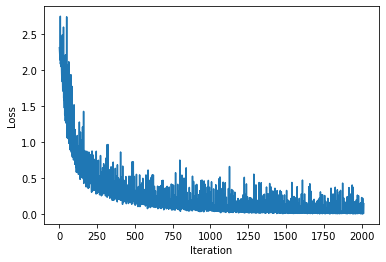

In [22]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

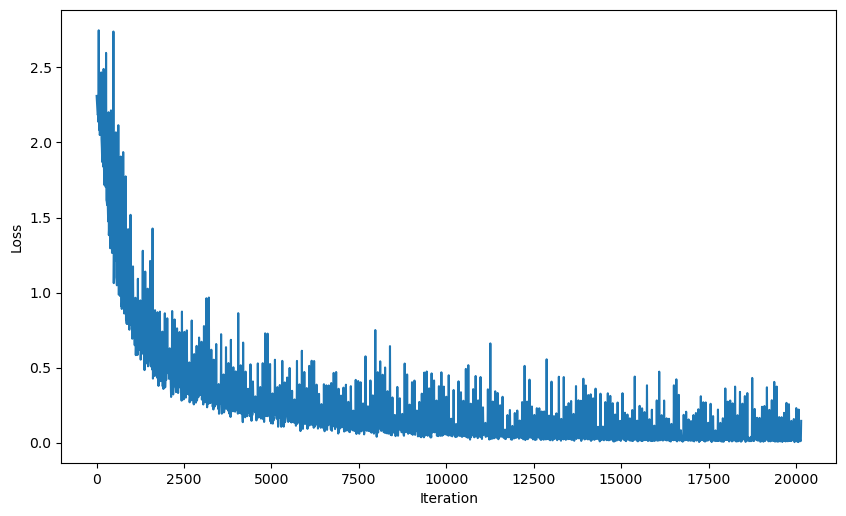

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
y = range(0,iter,10)
plt.plot(y,iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [174]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_dl, model):
    model.eval() 
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_dl:

            images = images.view(-1, 28*28).to(device)

            outputs = model(images)

            _, predicted = torch.max(outputs, 1)
            
            plt.imshow(images[0].reshape(28, 28, 1), cmap='gray')
            plt.title(f'Prediction: {predicted[0]} - Actual target: {labels[0]}')
            plt.show()
            

            total += labels.size(0)

            if torch.cuda.is_available():
                correct += (predicted.cpu() == labels.cpu()).sum() 
            else:
                correct += (predicted == labels).sum()

        acc = 100 * correct.item() / total
        return acc

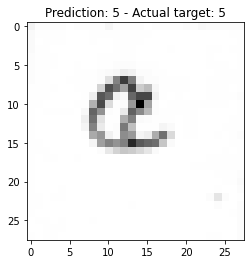

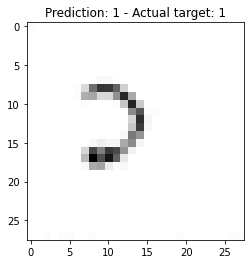

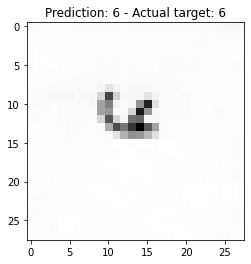

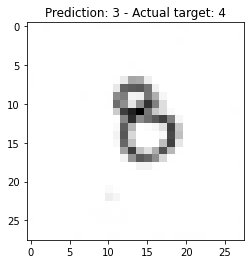

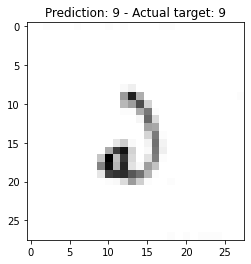

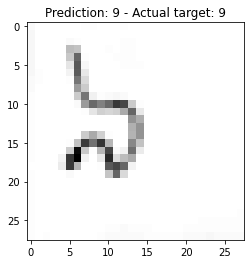

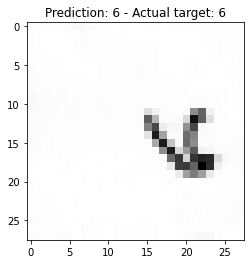

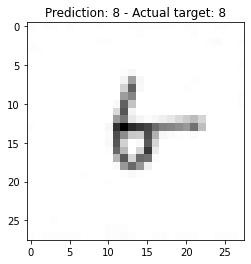

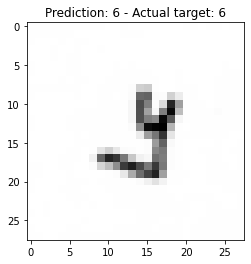

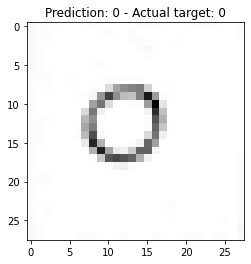

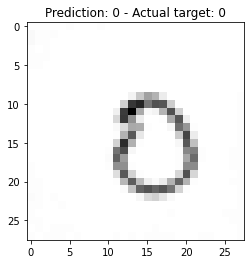

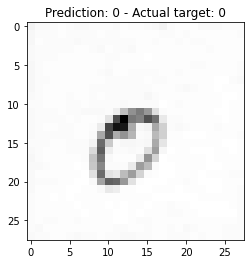

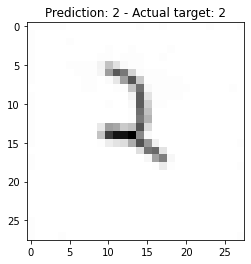

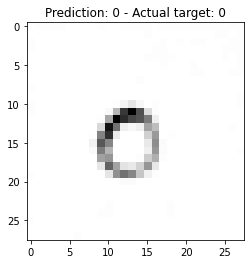

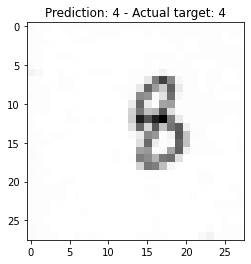

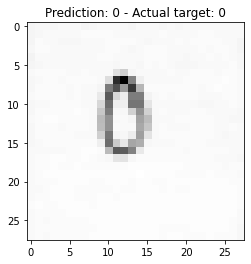

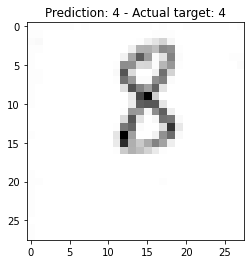

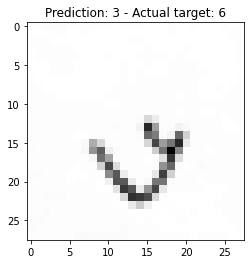

Test Accuracy: 83.453


In [175]:
acc = evaluate_model(test_loader, model)
print('Test Accuracy: %.3f' % acc)

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
url = 'Dataset/'
PATH = 'Dataset/'

In [3]:
# dataset_A = url + 'Dataset C.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [4]:

# data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
# print(data_labels.shape)
# data_labels.head()

In [5]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [6]:
TRAIN_PATH = url + 'training-c'


In [7]:
train_dataset = pd.read_csv(PATH + 'verification_train.csv')
test_dataset = pd.read_csv(PATH + 'verification_test.csv')

In [20]:
from PIL import Image    

class Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
#         path = self.root + "/" + item[0]
        im_array = np.int8(np.reshape(item[1:].to_numpy(), (28, 28))) # create a 2D array from flat array
        image = Image.fromarray(im_array, 'L')
#         image =(item[1:].to_numpy())
        label = item[0]
        
#         print(item.shape)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [21]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(train_dataset, train_transform)
test_data = Dataset(test_dataset, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  60000


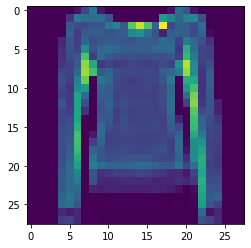

In [30]:
plt.imshow(test_data[2][0].reshape(28,28,1))

# **Base Parameters**

In [23]:
batch_size = 280
num_iters = 25000
input_dim = 28*28
num_hidden = 340
output_dim = 10

learning_rate = 0.025

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

116


In [31]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
# np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=test_sampler)


print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:172
Test dataloader:43


In [32]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
#         self.linear_6 = nn.Linear(num_hidden, num_hidden)
#         self.relu_6 = nn.ReLU()
        
#         self.linear_7 = nn.Linear(num_hidden, num_hidden)
#         self.relu_7 = nn.ReLU()
        
#         self.linear_8 = nn.Linear(num_hidden, num_hidden)
#         self.relu_8 = nn.ReLU()
        
#         self.linear_9 = nn.Linear(num_hidden, num_hidden)
#         self.relu_9 = nn.ReLU()

#         self.linear_10 = nn.Linear(num_hidden, num_hidden)
#         self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
#         out  = self.linear_6(out)
#         out = self.relu_6(out)
        
#         out  = self.linear_7(out)
#         out = self.relu_7(out)
        
#         out  = self.linear_8(out)
#         out = self.relu_8(out)
        
#         out  = self.linear_9(out)
#         out = self.relu_9(out)
        
#         out  = self.linear_10(out)
#         out = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas

In [33]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=340, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=340, out_features=340, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=340, out_features=340, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=340, out_features=340, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=340, out_features=340, bias=True)
  (relu_5): ReLU()
  (linear_out): Linear(in_features=340, out_features=10, bias=True)
)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

In [35]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.317701578140259. Accuracy: 16.8
Iteration: 20. Loss: 1.5332586765289307. Accuracy: 35.2
Iteration: 30. Loss: 1.2272371053695679. Accuracy: 41.75
Iteration: 40. Loss: 1.151277780532837. Accuracy: 49.21666666666667
Iteration: 50. Loss: 1.1249536275863647. Accuracy: 54.24166666666667
Iteration: 60. Loss: 0.887176513671875. Accuracy: 70.85833333333333
Iteration: 70. Loss: 0.7309978604316711. Accuracy: 72.63333333333334
Iteration: 80. Loss: 0.8902642726898193. Accuracy: 73.33333333333333
Iteration: 90. Loss: 0.6639557480812073. Accuracy: 74.36666666666666
Iteration: 100. Loss: 0.6069796681404114. Accuracy: 76.90833333333333
Iteration: 110. Loss: 0.6356116533279419. Accuracy: 78.5
Iteration: 120. Loss: 0.5071851015090942. Accuracy: 78.725
Iteration: 130. Loss: 0.6869134902954102. Accuracy: 77.275
Iteration: 140. Loss: 0.5471391081809998. Accuracy: 80.89166666666667
Iteration: 150. Loss: 0.504546046257019. Accuracy: 81.29166666666667
Iteration: 160. Loss: 0.43

Iteration: 1250. Loss: 0.20937354862689972. Accuracy: 88.58333333333333
Iteration: 1260. Loss: 0.30579888820648193. Accuracy: 88.64166666666667
Iteration: 1270. Loss: 0.16884906589984894. Accuracy: 88.9
Iteration: 1280. Loss: 0.2782089412212372. Accuracy: 88.55
Iteration: 1290. Loss: 0.22613967955112457. Accuracy: 88.50833333333334
Iteration: 1300. Loss: 0.22454480826854706. Accuracy: 88.38333333333334
Iteration: 1310. Loss: 0.25273188948631287. Accuracy: 88.575
Iteration: 1320. Loss: 0.27160343527793884. Accuracy: 88.55
Iteration: 1330. Loss: 0.20910415053367615. Accuracy: 88.86666666666666
Iteration: 1340. Loss: 0.27178406715393066. Accuracy: 89.01666666666667
Iteration: 1350. Loss: 0.27762219309806824. Accuracy: 88.275
Iteration: 1360. Loss: 0.1760016232728958. Accuracy: 88.59166666666667
Iteration: 1370. Loss: 0.30783605575561523. Accuracy: 88.15833333333333
Epoch:  9
Iteration: 1380. Loss: 0.2677631378173828. Accuracy: 88.30833333333334
Iteration: 1390. Loss: 0.2062077820301056. A

Iteration: 2460. Loss: 0.18510398268699646. Accuracy: 89.06666666666666
Iteration: 2470. Loss: 0.20634689927101135. Accuracy: 88.79166666666667
Iteration: 2480. Loss: 0.1417677253484726. Accuracy: 88.85
Iteration: 2490. Loss: 0.19086842238903046. Accuracy: 88.85833333333333
Iteration: 2500. Loss: 0.20555582642555237. Accuracy: 88.8
Iteration: 2510. Loss: 0.15975330770015717. Accuracy: 88.525
Iteration: 2520. Loss: 0.17392277717590332. Accuracy: 88.9
Iteration: 2530. Loss: 0.1667289435863495. Accuracy: 88.65
Iteration: 2540. Loss: 0.09838318824768066. Accuracy: 88.90833333333333
Iteration: 2550. Loss: 0.2107352316379547. Accuracy: 88.65
Iteration: 2560. Loss: 0.21857844293117523. Accuracy: 88.89166666666667
Iteration: 2570. Loss: 0.16783742606639862. Accuracy: 88.80833333333334
Iteration: 2580. Loss: 0.1928599327802658. Accuracy: 88.13333333333334
Epoch:  16
Iteration: 2590. Loss: 0.19507206976413727. Accuracy: 88.61666666666666
Iteration: 2600. Loss: 0.1822851598262787. Accuracy: 88.99

Iteration: 3660. Loss: 0.14449889957904816. Accuracy: 88.59166666666667
Iteration: 3670. Loss: 0.14208467304706573. Accuracy: 88.825
Iteration: 3680. Loss: 0.15867942571640015. Accuracy: 88.45833333333333
Iteration: 3690. Loss: 0.11659061163663864. Accuracy: 89.06666666666666
Iteration: 3700. Loss: 0.18092353641986847. Accuracy: 88.84166666666667
Iteration: 3710. Loss: 0.15257102251052856. Accuracy: 88.475
Iteration: 3720. Loss: 0.13892564177513123. Accuracy: 89.16666666666667
Iteration: 3730. Loss: 0.11899960041046143. Accuracy: 89.10833333333333
Iteration: 3740. Loss: 0.12528327107429504. Accuracy: 88.98333333333333
Iteration: 3750. Loss: 0.16096484661102295. Accuracy: 88.78333333333333
Iteration: 3760. Loss: 0.15729595720767975. Accuracy: 88.55833333333334
Iteration: 3770. Loss: 0.13230682909488678. Accuracy: 88.60833333333333
Iteration: 3780. Loss: 0.16573572158813477. Accuracy: 88.93333333333334
Epoch:  23
Iteration: 3790. Loss: 0.15230989456176758. Accuracy: 88.71666666666667
Ite

Iteration: 4850. Loss: 0.057009484618902206. Accuracy: 88.50833333333334
Iteration: 4860. Loss: 0.1034800335764885. Accuracy: 88.85
Iteration: 4870. Loss: 0.09104816615581512. Accuracy: 88.46666666666667
Iteration: 4880. Loss: 0.17032437026500702. Accuracy: 88.46666666666667
Iteration: 4890. Loss: 0.06918717175722122. Accuracy: 88.69166666666666
Iteration: 4900. Loss: 0.07360866665840149. Accuracy: 88.75833333333334
Iteration: 4910. Loss: 0.05918314680457115. Accuracy: 88.65833333333333
Iteration: 4920. Loss: 0.07932013273239136. Accuracy: 88.71666666666667
Iteration: 4930. Loss: 0.08730997890233994. Accuracy: 88.85833333333333
Iteration: 4940. Loss: 0.11128037422895432. Accuracy: 88.63333333333334
Iteration: 4950. Loss: 0.11826455593109131. Accuracy: 88.63333333333334
Iteration: 4960. Loss: 0.14987917244434357. Accuracy: 88.36666666666666
Iteration: 4970. Loss: 0.11128000169992447. Accuracy: 88.61666666666666
Iteration: 4980. Loss: 0.09429211169481277. Accuracy: 88.54166666666667
Epoc

Iteration: 6050. Loss: 0.07929170876741409. Accuracy: 88.66666666666667
Iteration: 6060. Loss: 0.04300759732723236. Accuracy: 88.56666666666666
Iteration: 6070. Loss: 0.06592919677495956. Accuracy: 88.525
Iteration: 6080. Loss: 0.1289328783750534. Accuracy: 88.36666666666666
Iteration: 6090. Loss: 0.1079481691122055. Accuracy: 88.39166666666667
Iteration: 6100. Loss: 0.05930527299642563. Accuracy: 88.625
Iteration: 6110. Loss: 0.08732287585735321. Accuracy: 88.4
Iteration: 6120. Loss: 0.08777805417776108. Accuracy: 88.41666666666667
Iteration: 6130. Loss: 0.05305244028568268. Accuracy: 88.76666666666667
Iteration: 6140. Loss: 0.09331858158111572. Accuracy: 88.76666666666667
Iteration: 6150. Loss: 0.04879383370280266. Accuracy: 88.34166666666667
Iteration: 6160. Loss: 0.08871239423751831. Accuracy: 88.43333333333334
Iteration: 6170. Loss: 0.10540866106748581. Accuracy: 88.325
Iteration: 6180. Loss: 0.06291264295578003. Accuracy: 88.5
Iteration: 6190. Loss: 0.1513790339231491. Accuracy: 

Iteration: 7250. Loss: 0.04662473872303963. Accuracy: 88.45
Iteration: 7260. Loss: 0.09105590730905533. Accuracy: 88.375
Iteration: 7270. Loss: 0.046889036893844604. Accuracy: 88.46666666666667
Iteration: 7280. Loss: 0.05439808964729309. Accuracy: 88.50833333333334
Iteration: 7290. Loss: 0.03190405294299126. Accuracy: 88.33333333333333
Iteration: 7300. Loss: 0.07054667174816132. Accuracy: 88.65
Iteration: 7310. Loss: 0.04844142496585846. Accuracy: 88.15
Iteration: 7320. Loss: 0.04170169308781624. Accuracy: 88.10833333333333
Iteration: 7330. Loss: 0.03970558941364288. Accuracy: 88.425
Iteration: 7340. Loss: 0.09114919602870941. Accuracy: 88.03333333333333
Iteration: 7350. Loss: 0.06970547884702682. Accuracy: 88.54166666666667
Iteration: 7360. Loss: 0.12678658962249756. Accuracy: 87.1
Iteration: 7370. Loss: 0.08033932745456696. Accuracy: 88.025
Iteration: 7380. Loss: 0.036593060940504074. Accuracy: 88.425
Iteration: 7390. Loss: 0.07315637916326523. Accuracy: 88.375
Epoch:  44
Iteration: 

Iteration: 8450. Loss: 0.028993120416998863. Accuracy: 88.36666666666666
Iteration: 8460. Loss: 0.047620195895433426. Accuracy: 88.525
Iteration: 8470. Loss: 0.07627922296524048. Accuracy: 88.25833333333334
Iteration: 8480. Loss: 0.040863361209630966. Accuracy: 88.40833333333333
Iteration: 8490. Loss: 0.0636017769575119. Accuracy: 88.1
Iteration: 8500. Loss: 0.1499585062265396. Accuracy: 88.16666666666667
Iteration: 8510. Loss: 0.02815289795398712. Accuracy: 88.34166666666667
Iteration: 8520. Loss: 0.052702225744724274. Accuracy: 88.35
Iteration: 8530. Loss: 0.06117122620344162. Accuracy: 88.64166666666667
Iteration: 8540. Loss: 0.021842816844582558. Accuracy: 88.45
Iteration: 8550. Loss: 0.060914114117622375. Accuracy: 88.475
Iteration: 8560. Loss: 0.0717436671257019. Accuracy: 88.46666666666667
Iteration: 8570. Loss: 0.06571940332651138. Accuracy: 88.35833333333333
Iteration: 8580. Loss: 0.07545212656259537. Accuracy: 88.39166666666667
Iteration: 8590. Loss: 0.1598711460828781. Accur

Epoch:  57
Iteration: 9640. Loss: 0.0479092001914978. Accuracy: 88.325
Iteration: 9650. Loss: 0.04685499146580696. Accuracy: 88.33333333333333
Iteration: 9660. Loss: 0.02446158602833748. Accuracy: 88.44166666666666
Iteration: 9670. Loss: 0.04061726853251457. Accuracy: 88.675
Iteration: 9680. Loss: 0.028175555169582367. Accuracy: 88.41666666666667
Iteration: 9690. Loss: 0.017876112833619118. Accuracy: 88.43333333333334
Iteration: 9700. Loss: 0.012692258693277836. Accuracy: 88.49166666666666
Iteration: 9710. Loss: 0.031036291271448135. Accuracy: 88.31666666666666
Iteration: 9720. Loss: 0.04527563601732254. Accuracy: 88.16666666666667
Iteration: 9730. Loss: 0.03109508566558361. Accuracy: 88.28333333333333
Iteration: 9740. Loss: 0.01627330482006073. Accuracy: 88.31666666666666
Iteration: 9750. Loss: 0.03926002234220505. Accuracy: 88.45833333333333
Iteration: 9760. Loss: 0.030370963737368584. Accuracy: 88.83333333333333
Iteration: 9770. Loss: 0.03874921053647995. Accuracy: 88.59166666666667

Iteration: 10800. Loss: 0.022882351651787758. Accuracy: 88.425
Iteration: 10810. Loss: 0.04055114462971687. Accuracy: 88.4
Iteration: 10820. Loss: 0.023110270500183105. Accuracy: 88.11666666666666
Iteration: 10830. Loss: 0.05836958810687065. Accuracy: 87.825
Epoch:  64
Iteration: 10840. Loss: 0.06997635215520859. Accuracy: 88.34166666666667
Iteration: 10850. Loss: 0.012736573815345764. Accuracy: 88.31666666666666
Iteration: 10860. Loss: 0.05353272706270218. Accuracy: 88.125
Iteration: 10870. Loss: 0.014353380538523197. Accuracy: 88.175
Iteration: 10880. Loss: 0.04358331486582756. Accuracy: 88.59166666666667
Iteration: 10890. Loss: 0.04862567037343979. Accuracy: 88.49166666666666
Iteration: 10900. Loss: 0.014497613534331322. Accuracy: 88.40833333333333
Iteration: 10910. Loss: 0.022720063105225563. Accuracy: 88.24166666666666
Iteration: 10920. Loss: 0.02767549455165863. Accuracy: 88.4
Iteration: 10930. Loss: 0.025749219581484795. Accuracy: 88.54166666666667
Iteration: 10940. Loss: 0.0321

Iteration: 11970. Loss: 0.029270382598042488. Accuracy: 88.41666666666667
Iteration: 11980. Loss: 0.02012409083545208. Accuracy: 88.11666666666666
Iteration: 11990. Loss: 0.03113603964447975. Accuracy: 88.2
Iteration: 12000. Loss: 0.028345679864287376. Accuracy: 88.36666666666666
Iteration: 12010. Loss: 0.03865266963839531. Accuracy: 88.29166666666667
Iteration: 12020. Loss: 0.032968372106552124. Accuracy: 88.29166666666667
Iteration: 12030. Loss: 0.02357267402112484. Accuracy: 88.20833333333333
Iteration: 12040. Loss: 0.12969887256622314. Accuracy: 87.40833333333333
Epoch:  71
Iteration: 12050. Loss: 0.045034486800432205. Accuracy: 88.2
Iteration: 12060. Loss: 0.09553132951259613. Accuracy: 88.175
Iteration: 12070. Loss: 0.0035541877150535583. Accuracy: 88.4
Iteration: 12080. Loss: 0.035787761211395264. Accuracy: 88.28333333333333
Iteration: 12090. Loss: 0.02582733891904354. Accuracy: 88.55
Iteration: 12100. Loss: 0.04997716471552849. Accuracy: 88.43333333333334
Iteration: 12110. Loss

Iteration: 13160. Loss: 0.006096138618886471. Accuracy: 88.28333333333333
Iteration: 13170. Loss: 0.017880093306303024. Accuracy: 88.25
Iteration: 13180. Loss: 0.03169592469930649. Accuracy: 88.13333333333334
Iteration: 13190. Loss: 0.042404357343912125. Accuracy: 88.24166666666666
Iteration: 13200. Loss: 0.033530812710523605. Accuracy: 88.33333333333333
Iteration: 13210. Loss: 0.009938342496752739. Accuracy: 88.38333333333334
Iteration: 13220. Loss: 0.0392218716442585. Accuracy: 88.325
Iteration: 13230. Loss: 0.01731058582663536. Accuracy: 88.34166666666667
Iteration: 13240. Loss: 0.011077696457505226. Accuracy: 88.41666666666667
Epoch:  78
Iteration: 13250. Loss: 0.008804179728031158. Accuracy: 88.41666666666667
Iteration: 13260. Loss: 0.023221120238304138. Accuracy: 88.475
Iteration: 13270. Loss: 0.0242773350328207. Accuracy: 88.60833333333333
Iteration: 13280. Loss: 0.016888611018657684. Accuracy: 88.35
Iteration: 13290. Loss: 0.010421618819236755. Accuracy: 88.30833333333334
Itera

Iteration: 14330. Loss: 0.012007237412035465. Accuracy: 88.3
Iteration: 14340. Loss: 0.01630210503935814. Accuracy: 87.89166666666667
Iteration: 14350. Loss: 0.006606323178857565. Accuracy: 88.15833333333333
Iteration: 14360. Loss: 0.012675344944000244. Accuracy: 88.29166666666667
Iteration: 14370. Loss: 0.00519214104861021. Accuracy: 88.125
Iteration: 14380. Loss: 0.0029006784316152334. Accuracy: 88.35
Iteration: 14390. Loss: 0.021150941029191017. Accuracy: 88.31666666666666
Iteration: 14400. Loss: 0.021866915747523308. Accuracy: 88.54166666666667
Iteration: 14410. Loss: 0.007200493942946196. Accuracy: 88.40833333333333
Iteration: 14420. Loss: 0.005041363183408976. Accuracy: 88.19166666666666
Iteration: 14430. Loss: 0.017851846292614937. Accuracy: 88.225
Iteration: 14440. Loss: 0.0065112304873764515. Accuracy: 88.45
Epoch:  85
Iteration: 14450. Loss: 0.053547780960798264. Accuracy: 88.05833333333334
Iteration: 14460. Loss: 0.019963543862104416. Accuracy: 88.33333333333333
Iteration: 1

Iteration: 15510. Loss: 0.050697553902864456. Accuracy: 88.35833333333333
Iteration: 15520. Loss: 0.01355922780930996. Accuracy: 88.34166666666667
Iteration: 15530. Loss: 0.01169204618781805. Accuracy: 88.28333333333333
Iteration: 15540. Loss: 0.005729310214519501. Accuracy: 88.46666666666667
Iteration: 15550. Loss: 0.008232017047703266. Accuracy: 88.49166666666666
Iteration: 15560. Loss: 0.04749596491456032. Accuracy: 88.4
Iteration: 15570. Loss: 0.02198820933699608. Accuracy: 88.39166666666667
Iteration: 15580. Loss: 0.015228865668177605. Accuracy: 88.45833333333333
Iteration: 15590. Loss: 0.005123675335198641. Accuracy: 88.65
Iteration: 15600. Loss: 0.006198225077241659. Accuracy: 88.49166666666666
Iteration: 15610. Loss: 0.010337285697460175. Accuracy: 88.4
Iteration: 15620. Loss: 0.014090316370129585. Accuracy: 88.40833333333333
Iteration: 15630. Loss: 0.0028543563093990088. Accuracy: 88.04166666666667
Iteration: 15640. Loss: 0.022221406921744347. Accuracy: 88.14166666666667
Itera

Iteration: 16680. Loss: 0.006592876277863979. Accuracy: 88.46666666666667
Epoch:  98
Iteration: 16690. Loss: 0.04112894460558891. Accuracy: 88.26666666666667
Iteration: 16700. Loss: 0.01054978184401989. Accuracy: 88.25833333333334
Iteration: 16710. Loss: 0.012369578704237938. Accuracy: 88.63333333333334
Iteration: 16720. Loss: 0.013715947046875954. Accuracy: 88.65833333333333
Iteration: 16730. Loss: 0.02549556829035282. Accuracy: 88.29166666666667
Iteration: 16740. Loss: 0.031046004965901375. Accuracy: 88.3
Iteration: 16750. Loss: 0.012207962572574615. Accuracy: 88.475
Iteration: 16760. Loss: 0.015121783129870892. Accuracy: 88.30833333333334
Iteration: 16770. Loss: 0.004532748367637396. Accuracy: 88.44166666666666
Iteration: 16780. Loss: 0.03726470097899437. Accuracy: 88.39166666666667
Iteration: 16790. Loss: 0.02591671608388424. Accuracy: 88.40833333333333
Iteration: 16800. Loss: 0.005495751276612282. Accuracy: 88.25833333333334
Iteration: 16810. Loss: 0.007394494954496622. Accuracy: 

Iteration: 17840. Loss: 0.023990057408809662. Accuracy: 88.41666666666667
Iteration: 17850. Loss: 0.006163734942674637. Accuracy: 88.2
Iteration: 17860. Loss: 0.019495250657200813. Accuracy: 88.48333333333333
Iteration: 17870. Loss: 0.004187060985714197. Accuracy: 88.41666666666667
Iteration: 17880. Loss: 0.013609322719275951. Accuracy: 88.05833333333334
Epoch:  105
Iteration: 17890. Loss: 0.08333864063024521. Accuracy: 88.025
Iteration: 17900. Loss: 0.016335217282176018. Accuracy: 88.50833333333334
Iteration: 17910. Loss: 0.021024079993367195. Accuracy: 88.45
Iteration: 17920. Loss: 0.010778787545859814. Accuracy: 88.6
Iteration: 17930. Loss: 0.011793345212936401. Accuracy: 88.60833333333333
Iteration: 17940. Loss: 0.023101098835468292. Accuracy: 88.03333333333333
Iteration: 17950. Loss: 0.0098710423335433. Accuracy: 88.325
Iteration: 17960. Loss: 0.012273968197405338. Accuracy: 88.41666666666667
Iteration: 17970. Loss: 0.010743965394794941. Accuracy: 88.19166666666666
Iteration: 1798

Iteration: 18990. Loss: 0.001044274540618062. Accuracy: 88.45833333333333
Iteration: 19000. Loss: 0.0060683563351631165. Accuracy: 88.325
Iteration: 19010. Loss: 0.022802691906690598. Accuracy: 88.21666666666667
Iteration: 19020. Loss: 0.0054451036266982555. Accuracy: 88.2
Iteration: 19030. Loss: 0.0037719535175710917. Accuracy: 88.14166666666667
Iteration: 19040. Loss: 0.004390855319797993. Accuracy: 88.50833333333334
Iteration: 19050. Loss: 0.02993449755012989. Accuracy: 88.325
Iteration: 19060. Loss: 0.010181724093854427. Accuracy: 88.41666666666667
Iteration: 19070. Loss: 0.01702137291431427. Accuracy: 88.625
Iteration: 19080. Loss: 0.005775738973170519. Accuracy: 88.50833333333334
Iteration: 19090. Loss: 0.0037282356061041355. Accuracy: 88.55
Epoch:  112
Iteration: 19100. Loss: 0.006857369095087051. Accuracy: 88.575
Iteration: 19110. Loss: 0.004672123119235039. Accuracy: 88.40833333333333
Iteration: 19120. Loss: 0.013719032518565655. Accuracy: 88.43333333333334
Iteration: 19130. L

In [36]:
torch.save(model.state_dict(), 'model_base_copy_good_'+str(accuracy)+'5_layer_280_340_25k_d_2.pkl')

[2.310192823410034, 2.2646231651306152, 2.2255804538726807, 2.1839067935943604, 2.189829111099243, 2.137085437774658, 2.747332811355591, 2.084721565246582, 2.1200168132781982, 2.04986834526062, 2.061260223388672, 2.0962564945220947, 2.100984811782837, 2.4666330814361572, 2.0235447883605957, 1.9630194902420044, 1.869904637336731, 2.0104188919067383, 1.947075366973877, 1.8387024402618408, 2.4898931980133057, 1.8310062885284424, 1.7171281576156616, 1.7570711374282837, 1.8101797103881836, 1.8654634952545166, 1.7030668258666992, 2.5967509746551514, 1.615992784500122, 1.6063600778579712, 1.5835915803909302, 1.6140021085739136, 1.5733331441879272, 1.4740899801254272, 2.201530694961548, 1.3826974630355835, 1.4521039724349976, 1.4055627584457397, 1.4008347988128662, 1.295232892036438, 1.365106225013733, 2.213675022125244, 1.4312825202941895, 1.5276635885238647, 1.2644017934799194, 1.3324124813079834, 1.3252050876617432, 1.4129689931869507, 2.7391934394836426, 1.0629019737243652, 1.3315707445144

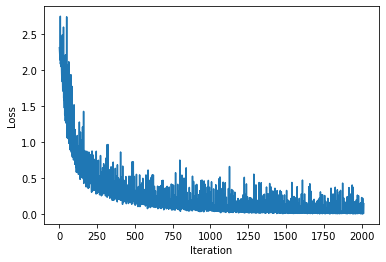

In [22]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

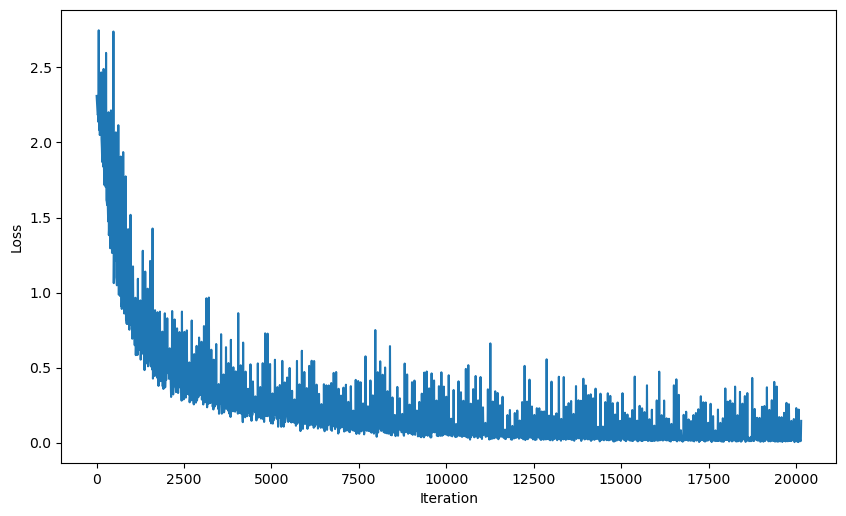

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
y = range(0,iter,10)
plt.plot(y,iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [118]:
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size)

In [170]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_dl, model):
    model.eval() 
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_dl:

            images = images.view(-1, 28*28).to(device)

            outputs = model(images)

            _, predicted = torch.max(outputs, 1)
            
            plt.imshow(images[0].reshape(28, 28, 1), cmap='gray')
            plt.title(f'Prediction: {predicted[0]} - Actual target: {labels[0]}')
            plt.show()

            total += labels.size(0)

            if torch.cuda.is_available():
                correct += (predicted.cpu() == labels.cpu()).sum() 
            else:
                correct += (predicted == labels).sum()

        acc = 100 * correct.item() / total
        return acc

In [171]:


acc = evaluate_model(test_loader, model)
print('Accuracy: %.3f' % acc)

Accuracy: 83.268
